In [1]:
import numpy as np
from PIL import Image
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.losses import *
from tensorflow.keras.regularizers import *
from tensorflow.keras.initializers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.datasets import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.preprocessing.text import * 
from tensorflow.keras.preprocessing.sequence import * 

# Preprocessing sequence data

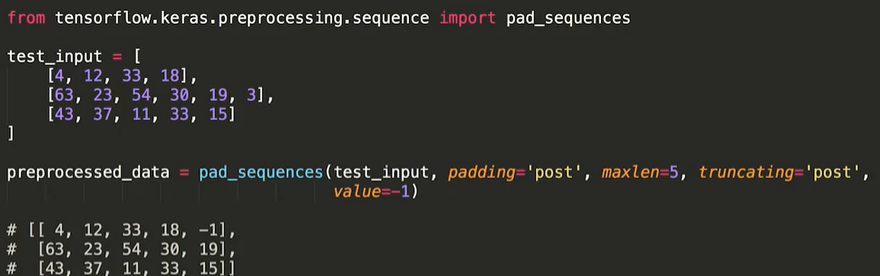

In [2]:
Image.open(r'C:\Users\44788/Desktop\it1.png')

padding - which side does the padding get set to.

maxlen - max length before the sequences get truncated.

truncating - which side does the truncating get set to. 

value - values of the padded values.

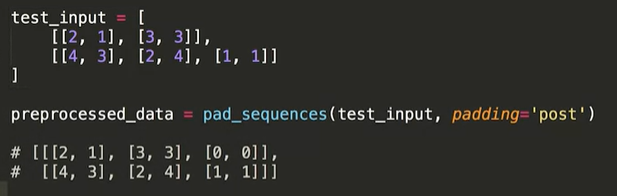

In [3]:
Image.open(r'C:\Users\44788/Desktop\it2.png')

list of lists, each list can have multiple compenents for each time step... and these can be padded.

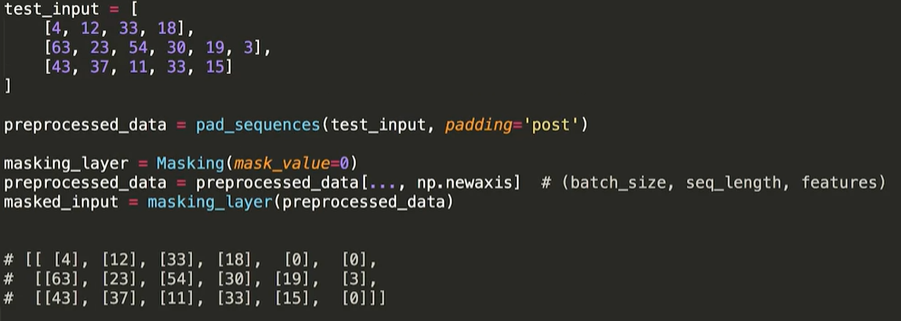

In [4]:
Image.open(r'C:\Users\44788/Desktop\it3.png')

create an instance of the layer. tell it the value used to pad the sequence. 

the masked values requires a multidimensional array (batch size, seq_length, features).

then call this layer on the processed data input. the difference between this tensor and the padded alone.

is it has a new attribute called keras.mask - this is a boolean tensor. this signals which values were part of the originaL tensor and which should be ignored. 

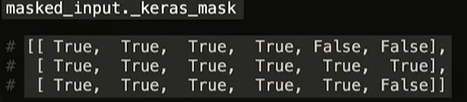

In [5]:
Image.open(r'C:\Users\44788/Desktop\it4.png')

In [6]:
import tensorflow.keras.datasets.imdb as imdb

In [7]:
(x_train, y_train), (x_test, y_test) = imdb.load_data()

# imdb.load_data(skip_top  = 10)
# imdb.load_data(num_words = 1000)
# imdb.load_data(start_char = 1)

17465344/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\44788\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\44788\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mea

In [8]:
imdb_word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [9]:
index_from = 3
imdb_word_index = {key: value + index_from for key, value in imdb_word_index.items()}

In [11]:
imdb_word_index['fawn']

34704

In [17]:
# x_train is an array of ragged lists 
padded_x_train = pad_sequences(x_train, maxlen = 300, padding='post', truncating='pre')

In [18]:
padded_x_train.shape

(25000, 300)

In [19]:
# (batch, sequence, features)
padded_x_train = np.expand_dims(padded_x_train, -1)

In [20]:
tf_xtrain = tf.convert_to_tensor(padded_x_train, dtype='float32')
masking_layer = Masking(mask_value=0.0)

In [21]:
masked_xtrain = masking_layer(tf_xtrain)

In [26]:
masked_xtrain._keras_mask

<tf.Tensor: shape=(25000, 300), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])>

# The embedding layer

allows the netword to learn its own representation of a token input. it will map each token to some higher dimensional embedding space. you can download pretrained word embeddings. however, if you create your own the word embeddings you develop will be specific to the task you trained the model on. 

input dimension: 1000 (total number of unique words in corpus/len(tokenizer.word_index)).

embedding dimension: 32.

input_length: length of sequence data.

mask_zero: interpret any zeros in the input as padding values. this means the resulting tensor can return a _keras_mask

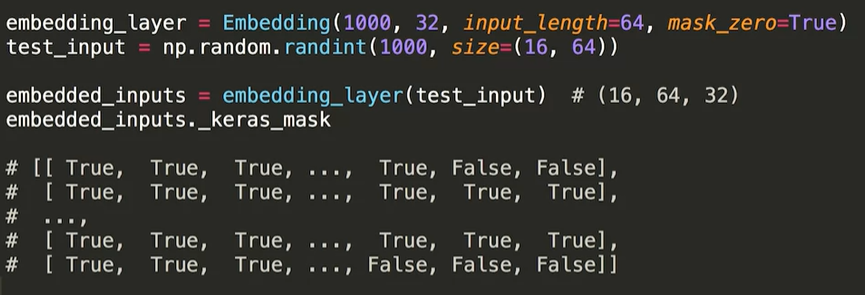

In [27]:
Image.open(r'C:\Users\44788/Desktop\it5.png')

In [28]:
len(imdb_word_index)+1

88585

In [33]:
embedding_layer = Embedding(input_dim=88585, output_dim=16, mask_zero=True)

In [34]:
sequence_of_embeddings = embedding_layer(masked_xtrain[1])

In [35]:
sequence_of_embeddings

<tf.Tensor: shape=(300, 1, 16), dtype=float32, numpy=
array([[[ 0.02620491,  0.04250259,  0.0394924 , ...,  0.00324224,
          0.01515896, -0.04197267]],

       [[ 0.04431837,  0.0355396 , -0.01182111, ..., -0.02554687,
         -0.00763923,  0.03800723]],

       [[-0.01554617,  0.00435406, -0.04997949, ..., -0.01484288,
         -0.04703945, -0.02946805]],

       ...,

       [[ 0.00569535,  0.00194169, -0.02896923, ..., -0.04904869,
          0.01006576, -0.03942017]],

       [[ 0.00569535,  0.00194169, -0.02896923, ..., -0.04904869,
          0.01006576, -0.03942017]],

       [[ 0.00569535,  0.00194169, -0.02896923, ..., -0.04904869,
          0.01006576, -0.03942017]]], dtype=float32)>

In [42]:
sequence_of_embeddings._keras_mask[-1]

<tf.Tensor: shape=(1,), dtype=bool, numpy=array([False])>

In [40]:
embedding_layer.get_weights()[0].shape

(88585, 16)

# The Embedding Projector

In [43]:
def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [44]:
def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [45]:
(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset()
imdb_word_index = get_imdb_word_index()

In [46]:
# swap keys and values of word index
reverse_word_index = dict([(value, key) for (key, value) in imdb_word_index.items()])

In [48]:
# get a configured sentence
[reverse_word_index[index] for index in x_train[100] if index > 2]

In [54]:
max_index_value = max(imdb_word_index.values())
embedding_dim = 16

In [55]:
model = Sequential([
    Embedding(max_index_value, embedding_dim),
    GlobalAveragePooling1D(),
    Dense(1, activation='sigmoid')
])

In [59]:
inputs = Input(shape=(None, )) # None means flexible sequence length, by , or only one dimension
x = Embedding(max_index_value, embedding_dim)(inputs)
x = GlobalAveragePooling1D()(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

In [60]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_6 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,017
Trainable params: 160,017
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

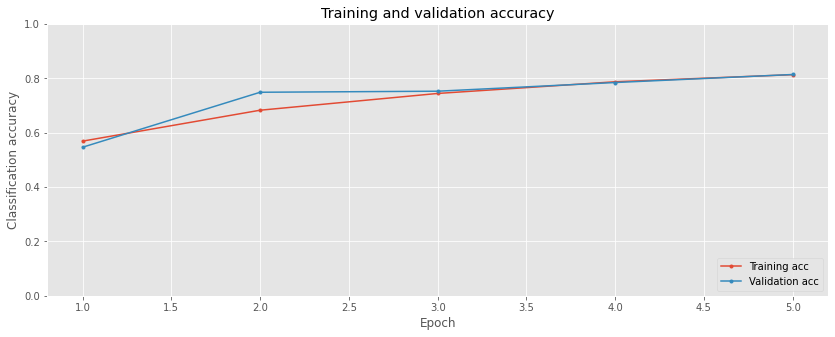

In [64]:
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

# Recurrent neural network layers

In general a RNN expects an input of (batch_size, seqeunce_length, feature_dims)

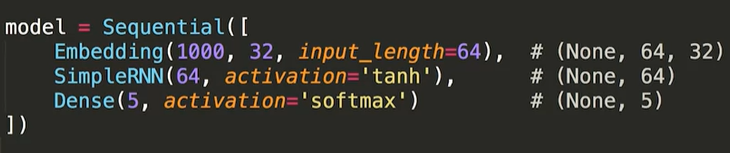

In [65]:
Image.open(r'C:\Users\44788/Desktop\it6.png')

however, you can ommit the input length argument when using an RNN, this is because RNNs can take flexible length inputs.

this is because the RNN only outputs on the final timestep a single value whch is then passed into Dense layer.

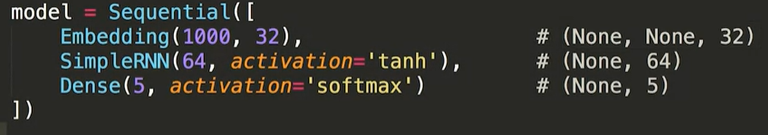

In [66]:
Image.open(r'C:\Users\44788/Desktop\it7.png')

SimpleRNN can be replaced with :

LSTM(64, activation='tanh'),

GRU(64, activation='tanh')

In [68]:
max_index_value = max(imdb_word_index.values())
embedding_dim = 16

In [72]:
inputs = Input(shape=(None, ))
x = Embedding(max_index_value, embedding_dim, mask_zero=True)(inputs)
x = LSTM(16, activation='tanh')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), verbose=0)

In [ ]:
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in imdb_word_index.items()])
model.predict(x_test[None, 0, :])

In [ ]:
y_test[0]

# Stacked RNNs and the Bidirectional wrapper

sometimes you want recurrent layers to output a sequence - perhaps to feed into a second recurrent layer.

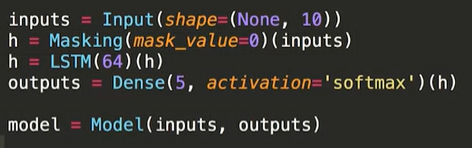

In [75]:
Image.open(r'C:\Users\44788/Desktop\it8.png')

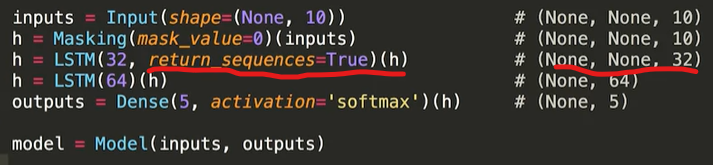

In [76]:
Image.open(r'C:\Users\44788/Desktop\it9.png')

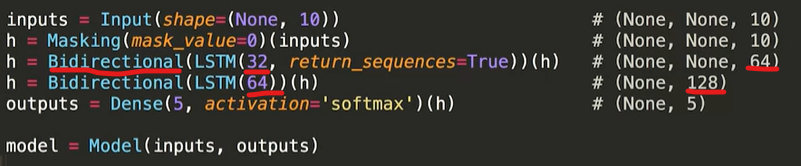

In [78]:
Image.open(r'C:\Users\44788/Desktop\it11.png')

effectively 2 LSTMs in bidirectional blocks. this means that there are double the output dimensions as the output is concaternated. however you can choose sum...

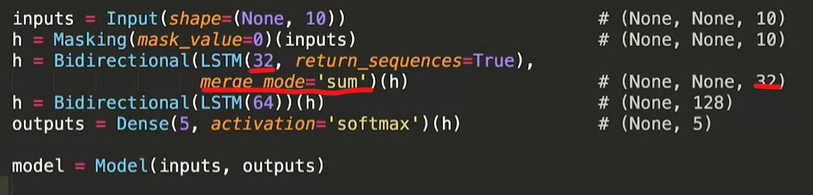

In [79]:
Image.open(r'C:\Users\44788/Desktop\it12.png')

In [81]:
# models

inputs = Input(shape=(None,)) # (None, None, 1)
x = Embedding(max_index_value, embedding_dim, mask_zero=True)(inputs) # (None, None, 16)
x = LSTM(32, return_sequences=True)(x) # (None, None, 32)
x = LSTM(32, return_sequences=False)(x) # (None, 32)
outputs = Dense(1, activation='sigmoid')(x) # (None, 1)
model1 = Model(inputs=inputs, outputs=outputs)

inputs = Input(shape=(None,)) # (None, None, 1)
x = Embedding(max_index_value, embedding_dim, mask_zero=True)(inputs) # (None, None, 16)
x = Bidirectional(LSTM(8), merge_mode='sum')(x) # (None, 16)
outputs = Dense(1, activation='sigmoid')(x) # (None, 1)
model2 = Model(inputs=inputs, outputs=outputs)

inputs = Input(shape=(None,)) # (None, None, 1)
x = Embedding(max_index_value, embedding_dim, mask_zero=True)(inputs) # (None, None, 16)
x = Bidirectional(layer = LSTM(8), merge_mode='sum',
                 backward_layer = GRU(8, go_backwards=True))(x) # (None, 8)
outputs = Dense(1, activation='sigmoid')(x) # (None, 1)
model2_5 = Model(inputs=inputs, outputs=outputs)

inputs = Input(shape=(None,)) # (None, None, 1)
x = Embedding(max_index_value, embedding_dim, mask_zero=True)(inputs) # (None, None, 16)
x = Bidirectional(LSTM(8, return_sequences=True), merge_mode='concat')(x) # (None, 16)
x = GRU(8, return_sequences=False)(x) # (None, 32)
outputs = Dense(1, activation='sigmoid')(x) # (None, 1)
model3 = Model(inputs=inputs, outputs=outputs)

# Stateful RNNs

In [82]:
gru = Sequential([
    GRU(5, input_shape=(None, 1), name='rnn')
])

In [83]:
stateful_gru = Sequential([
    GRU(5, stateful=True, batch_input_shape=(2, None, 1), name='stateful_rnn')
])

In [84]:
inputs = Input(batch_shape=(2, None, 1))
outputs = GRU(5, stateful=True, name='stateful_rnn')(inputs)

stateful_gru = Model(inputs=inputs, outputs=outputs)

Note that as well as setting stateful=True, we have also specified the batch_input_shape. This fixes the number of elements in a batch, as well as providing the sequence length and number of features. So the above model will always require a batch of 2 sequences.

When using stateful RNNs, it is necessary to supply this argument to the first layer of a Sequential model. This is because the model will always assume that each element of every subsequent batch it receives will be a continuation of the sequence from the corresponding element in the previous batch.

Another detail is that when defining a model with a stateful RNN using the functional API, you will need to specify the batch_shape argument as follows:

In [86]:
gru.get_layer('rnn').states

[None]

In [85]:
stateful_gru.get_layer('stateful_rnn').states

[<tf.Variable 'stateful_rnn/Variable:0' shape=(2, 5) dtype=float32, numpy=
 array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=float32)>]

In [87]:
sequence_data = tf.constant([
    [[-4.], [-3.], [-2.], [-1.], [0.], [1.], [2.], [3.], [4.]],
    [[-40.], [-30.], [-20.], [-10.], [0.], [10.], [20.], [30.], [40.]]
], dtype=tf.float32)
sequence_data.shape

TensorShape([2, 9, 1])

In [88]:
_1 = gru(sequence_data)
_2 = stateful_gru(sequence_data)

In [89]:
gru.get_layer('rnn').states

[None]

In [90]:
stateful_gru.get_layer('stateful_rnn').states

[<tf.Variable 'stateful_rnn/Variable:0' shape=(2, 5) dtype=float32, numpy=
 array([[-0.52180386, -0.89926296,  0.5731537 , -0.3498544 , -0.8780017 ],
        [ 0.4696324 , -1.        ,  0.99999994,  0.3619195 , -1.        ]],
       dtype=float32)>]

The stateful RNN model has updated and retained its state after having processed the input sequence batch. This internal state could then be used as the initial state for processing a continuation of both sequences in the next batch.